# **Ejercicio 2**

Generar un dataset que contenga dos conjuntos Gaussianos con diferente media y DS, N = 50 c/u, uno con etiqueta A y otro con etiqueta B.

Utilizar la curva ROC para proponer un umbral para un clasificador por mínimo error. Evaluar algunos de los parámetros de calidad (exactitud, precisión, f-measure).

Recalcular para algunas variantes (por ejemple, acercando las medias de los grupos A y B, cambiando el valor umbral, etc.)

¿Cómo podrían hacer no supervisado (automático) este proceso?

## **Importar Librerías**

In [28]:
# Usaremos las siguientes bibliotecas
# Datos
import numpy as np 
import pandas as pd 

# Viz
import seaborn as sns
import matplotlib.pyplot as plt

## **Generar dataset**

In [29]:
# Genero aleatoriamente el dataset con dos clases A y B con medias y DS distintas
np.random.seed(1)
meanA = -0.25
meanB = +0.25
dsA = 0.1
dsB = 0.2
df = pd.DataFrame(np.random.normal(loc=[meanA,meanB], scale=[dsA,dsB], size=(50, 2)),columns=['A','B'])
df

,A,B
0,-0.087565,0.127649
1,-0.302817,0.035406
2,-0.163459,-0.210308
3,-0.075519,0.097759
4,-0.218096,0.200126
5,-0.103789,-0.162028
6,-0.282242,0.173189
7,-0.136623,0.030022
8,-0.267243,0.074428
9,-0.245779,0.366563


In [30]:
df.describe()

,A,B
count,50.000000,50.000000
mean,-0.236230,0.246693
std,0.082012,0.191233
min,-0.394411,-0.210308
25%,-0.286743,0.122341
50%,-0.237901,0.253093
75%,-0.199317,0.385565
max,-0.031442,0.670051


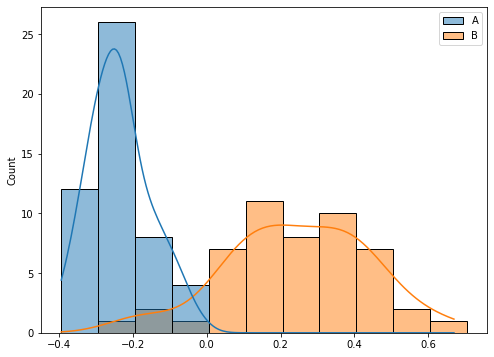

In [31]:
# Destacar que la información sigue una distribución normal

plt.figure(figsize=(8,6))
sns.histplot(df, binwidth=0.1, kde=True)

Observamos que las ditribuciones no son perfectamente Gaussianas porque la estadística es baja (sólo contamos con 50 registros de cada clase). Después veremos qué pasa si aumentamos N y también si tocamos la media y la DS. Por ahora trabajemos con este dataset.

In [32]:
# Ahora a la clase A la voy a identificar con un 0 y a la clase B con un 1.
# Entonces genero otro dataset que me junte los valores de A y B en un solo atributo.

dfA = pd.DataFrame({"value":df['A'], "class": np.zeros((50,), dtype=int)})
dfB = pd.DataFrame({"value":df['B'], "class": np.ones((50,), dtype=int)})

data = pd.concat([dfA,dfB], ignore_index=True)
data


,value,class
0,-0.087565,0
1,-0.302817,0
2,-0.163459,0
3,-0.075519,0
4,-0.218096,0
...,...,...
95,0.287031,1
96,0.122254,1
97,0.265468,1
98,0.258719,1


In [33]:
# Ahora necesito generar arrays separando los valores en "X" y las clases en "y" para luego entrenar el clasificador
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values
X , y

(array([[-0.08756546],
        [-0.30281718],
        [-0.16345924],
        [-0.07551882],
        [-0.21809609],
        [-0.10378921],
        [-0.28224172],
        [-0.13662306],
        [-0.26724282],
        [-0.24577863],
        [-0.36006192],
        [-0.15984093],
        [-0.15991441],
        [-0.26228902],
        [-0.27678881],
        [-0.31916608],
        [-0.31871727],
        [-0.31712461],
        [-0.36173103],
        [-0.08401978],
        [-0.26918356],
        [-0.32471583],
        [-0.24491922],
        [-0.23090845],
        [-0.2379841 ],
        [-0.21998297],
        [-0.36425182],
        [-0.27088942],
        [-0.16610166],
        [-0.22144127],
        [-0.32543979],
        [-0.19870702],
        [-0.20114819],
        [-0.13683706],
        [-0.03144246],
        [-0.39441138],
        [-0.23399629],
        [-0.21843651],
        [-0.2806204 ],
        [-0.22699053],
        [-0.27223281],
        [-0.23134386],
        [-0.23017003],
        [-0

## **Clasificador por mínimo error**

Lo que hace este clasificador es asignar a un evento *x* la clase *w$_i$* para la cual la probabilidad a posteriori es mayor:

*x --> w$_i$     <==>     P(w$_i$|x) = máx$_{j=1,2}$ P(w$_j$|x)* 

Considero como clase positiva a la clase B. Entonces para construir la curva ROC reordeno el dataframe de menor a mayor, cuento los True y False para dividir el eje X y el eje Y. Por como está construido el dataset ya sé que tengo 50 A y 50 B. Entonces divido ambos ejes en 50 partes iguales y calculo las fpr y tpr para luego realizar la curva ROC.

In [35]:
data_ascending = data.sort_values(['value'], ignore_index=True)
paso = 1./50.

minerror_fpr = np.zeros([101], dtype=np.float64)
minerror_tpr = np.zeros([101], dtype=np.float64)

i = 0
minerror_fpr[i] = 1.
minerror_tpr[i] = 1.
for valor in data_ascending['class']:
  i += 1
  if valor == 0:  #False
    minerror_tpr[i] = minerror_tpr[i-1] 
    minerror_fpr[i] = minerror_fpr[i-1] - paso
  elif valor == 1:  #True
    minerror_tpr[i] = minerror_tpr[i-1] - paso
    minerror_fpr[i] = minerror_fpr[i-1]

## **Train-Test split**

Me interesa además utilizar otros clasificadores para compararlos con el de mínimo error. Para ello necesito dividir los datos entre training y test data:

In [36]:
from sklearn.model_selection import train_test_split

# Me quedo con el 40% for testing, random_state=5 para que me los mezcle.
# Después puedo jugar con estos valores a ver qué cambia.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
X_train, y_train

(array([[-0.13683706],
        [-0.22144127],
        [-0.21030774],
        [-0.27678881],
        [ 0.14910683],
        [ 0.42702823],
        [ 0.28703128],
        [-0.07551882],
        [-0.31706623],
        [-0.15984093],
        [ 0.25871937],
        [-0.13010821],
        [ 0.55396336],
        [ 0.24746708],
        [ 0.40240224],
        [ 0.42523378],
        [-0.31200008],
        [ 0.23488566],
        [ 0.36656304],
        [-0.08401978],
        [ 0.19038143],
        [-0.2806204 ],
        [ 0.29688314],
        [-0.16345924],
        [-0.19870702],
        [-0.02929927],
        [ 0.03540628],
        [-0.23399629],
        [-0.21809609],
        [-0.08756546],
        [ 0.07442832],
        [-0.10378921],
        [ 0.12225392],
        [-0.30281718],
        [ 0.32551276],
        [-0.23134386],
        [-0.24577863],
        [-0.36173103],
        [ 0.33201033],
        [-0.20765056],
        [ 0.17064929],
        [ 0.17955003],
        [ 0.36732464],
        [-0

## **Clasificadores SVM y Logistic**

In [37]:
# Voy a utilizar estos dos clasificadores de scikit-learn y comparar cuál funciona mejor

# SVM classifier
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)

# Logistic Classifier
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)

# La función decision_function() me devuelve la distancia que hay entre la predicción y la recta del clasificador que me separa las clases.
# Valores positivos indican que la variable pertenece a la clase positiva.
# Si quiero que me devuelva la probabilidad tengo que usar la función predict_function()

## **Curva ROC**

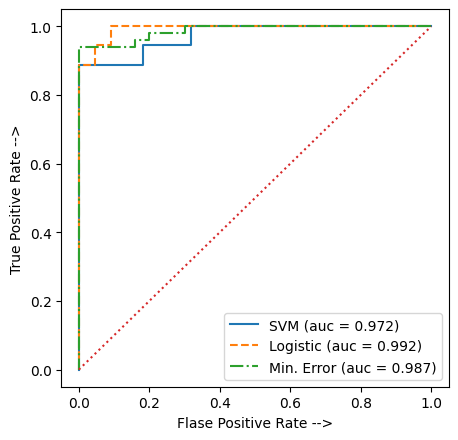

(array([ 1.00000000e+00,  9.80000000e-01,  9.60000000e-01,  9.40000000e-01,
         9.20000000e-01,  9.00000000e-01,  8.80000000e-01,  8.60000000e-01,
         8.40000000e-01,  8.20000000e-01,  8.00000000e-01,  7.80000000e-01,
         7.60000000e-01,  7.40000000e-01,  7.20000000e-01,  7.00000000e-01,
         6.80000000e-01,  6.60000000e-01,  6.40000000e-01,  6.20000000e-01,
         6.00000000e-01,  5.80000000e-01,  5.60000000e-01,  5.40000000e-01,
         5.20000000e-01,  5.00000000e-01,  4.80000000e-01,  4.60000000e-01,
         4.40000000e-01,  4.20000000e-01,  4.00000000e-01,  3.80000000e-01,
         3.60000000e-01,  3.40000000e-01,  3.20000000e-01,  3.00000000e-01,
         3.00000000e-01,  2.80000000e-01,  2.60000000e-01,  2.40000000e-01,
         2.20000000e-01,  2.00000000e-01,  2.00000000e-01,  1.80000000e-01,
         1.60000000e-01,  1.60000000e-01,  1.40000000e-01,  1.20000000e-01,
         1.00000000e-01,  8.00000000e-02,  6.00000000e-02,  4.00000000e-02,
         2.0

In [38]:
from sklearn.metrics import roc_curve, auc

# Calculo las TPR y FPR y el area debajo de la curva (AUC)
logistic_fpr, logistic_tpr, logistic_threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, svm_threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

auc_minerror = auc(minerror_fpr, minerror_tpr)

# Grafico las curvas y comparo los valores de AUC
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='solid', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, linestyle='dashed', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(minerror_fpr, minerror_tpr, linestyle='dashdot', label='Min. Error (auc = %0.3f)' % auc_minerror)
plt.plot([0, 1], linestyle='dotted')

plt.xlabel('Flase Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()
minerror_fpr, minerror_tpr

## **Análisis**

En la leyenda vemos que para el clasificador Logistic el área debajo de la curva es mayor que en los otros casos, lo que nos sugiere que es el mejor clasificador para este dataset, seguido por el de Mínimo Error.

Al principio comienzan las tres curvas iguales, siendo las primera en separarse las Logistic y SVM. En esta primera zona tanto Logistic como SVM se comportan iguales. No se distingue una preferencia entre ellos. Luego, moviéndonos en dirección creciente de FPR, la curva de SVM se separa de la de Logistic en FPR = 0.045, y si trazamos una recta perpendicular a la recta identidad, que representa un clasificador aleatorio, se observa que el clasificador Logistic es el idóneo ya que su curva es la más lejana a dicha recta. A partir de aquí la curva Logistic muestra que es el mejor clasificador para este dataset, siendo siempre la más alejada de la recta identidad a excepción de la zona FPR < 0.045.

Por otro lado, analizando la curva del clasificador de mínimo error vemos que alcanza dos puntos de equilibrio que se identifican con las coordenadas:

1. (FPR, TPR) = (0.16, 0.96)
2. (FPR, TPR) = (0.20, 0.98)

El punto 1 me devuelve un 96% de tasa de verdaderos positivos y un 16% de tasa de falsos positivos, mientras que el punto 2 arroja un 98% de tasa de verdaderos positivos y un 20% de tasa de falsos positivos. Dicho esto, seleccionemos estos dos valores umbrales para el caso del clasificador de mínimo error y evaluemos los parámetros de calidad para quedarnos con uno. Pero primero, veamos con qué valor de x se corresponden estos puntos.

Valor umbral 1 (rojo) =  -0.15444024316480065
Valor umbral 2 (verde)=  -0.16202814189953085


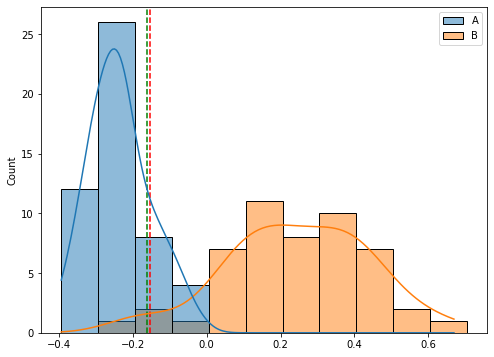

In [39]:
for i in range(0,101):
  if (0.96 - minerror_tpr[i] < 0.001) and (0.16 - minerror_fpr[i] < 0.001):
    j1 = i
  if (0.98 - minerror_tpr[i] < 0.001) and (0.20 - minerror_fpr[i] < 0.001):
    j2 = i

plt.figure(figsize=(8,6))
plt.axvline(x=data_ascending['value'][j1], color='r', linestyle = 'dashed')
plt.axvline(x=data_ascending['value'][j2], color='g', linestyle = 'dashed')
sns.histplot(df, binwidth=0.1, kde=True)

x1_umbral = data_ascending['value'][j1]
x2_umbral = data_ascending['value'][j2]

print('Valor umbral 1 (rojo) = ', x1_umbral)
print('Valor umbral 2 (verde)= ', x2_umbral)

## **Parámetros de Calidad**

Evaluemos algunos parámetros de calidad como la exactitud, precisón y f-measure.

In [40]:
condition_positive = 50
condition_negative = 50

# Valor umbral 1. (FPR, TPR) = (0.16, 0.96)

FPR1 = 0.16
TPR1 = 0.96

TP1 = TPR1 * condition_positive   # True Positive
FP1 = FPR1 * condition_negative   # False Positive
TN1 = condition_negative - FP1    # True Negative
FN1 = condition_positive - TP1    # False Negative

prediction_positive_1 = TP1 + FP1
prediction_negative_1 = TN1 + FN1

accuracy_1 = (TP1 + TN1) / (condition_negative + condition_positive)
precision_1 = TP1 / prediction_positive_1
f_measure_1 = 2*precision_1*TPR1 / (precision_1 + TPR1)

# Valor umbral 2. (FPR, TPR) = (0.20, 0.98)

FPR2 = 0.20
TPR2 = 0.98

TP2 = TPR2 * condition_positive   # True Positive
FP2 = FPR2 * condition_negative   # False Positive
TN2 = condition_negative - FP2    # True Negative
FN2 = condition_positive - TP2    # False Negative

prediction_positive_2 = TP2 + FP2
prediction_negative_2 = TN2 + FN2

accuracy_2 = (TP2 + TN2) / (condition_negative + condition_positive)
precision_2 = TP2 / prediction_positive_2
f_measure_2 = 2*precision_2*TPR2 / (precision_2 + TPR2)

In [41]:
from tabulate import tabulate

tabla = [['','Valor Umbral 1','Valor Umbral 2'],
         ['Exactitud', round(accuracy_1,2), round(accuracy_2,2)],
         ['Precision', round(precision_1,2), round(precision_2,2)],
         ['f-measure', round(f_measure_1,2), round(f_measure_2,2)]]
        
print(tabulate(tabla,
               tablefmt='fancy_grid',
               stralign='center'))

╒═══════════╤════════════════╤════════════════╕
│           │ Valor Umbral 1 │ Valor Umbral 2 │
├───────────┼────────────────┼────────────────┤
│ Exactitud │      0.9       │      0.89      │
├───────────┼────────────────┼────────────────┤
│ Precision │      0.86      │      0.83      │
├───────────┼────────────────┼────────────────┤
│ f-measure │      0.91      │      0.9       │
╘═══════════╧════════════════╧════════════════╛


Vemos en estos parámetros que la exactitud y la precisión son bastante altas para los valores umbrales considerados. Pareciera que el primer punto elegido es más adecuado ya que arroja mejores valores de exactitud y precisión. Por lo tanto, éste será el valor a seleccionar.

El parámetro f-measure no arroja información relevante aquí ya que las clases son simétricas (50 positivas y 50 negativas).

## **Acercando las medias de los grupos A y B**

Analicemos cómo cambian las curvas ROC y los parámetros de calidad si modificamos las medias de los conjuntos generados para que sean muy cercanas.

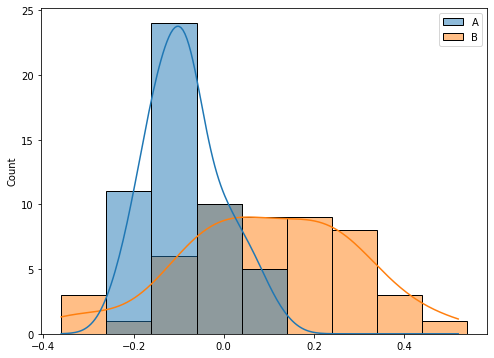

In [42]:
# Genero aleatoriamente el dataset con dos clases A y B con medias más cercanas y mismas DS que antes
np.random.seed(1)
#meanA = -0.25
#meanB = +0.25
meanA = -0.1
meanB = +0.1
dsA = 0.1
dsB = 0.2
df = pd.DataFrame(np.random.normal(loc=[meanA,meanB], scale=[dsA,dsB], size=(50, 2)),columns=['A','B'])

# Destacar que la información sigue una distribución normal

plt.figure(figsize=(8,6))
sns.histplot(df, binwidth=0.1, kde=True)

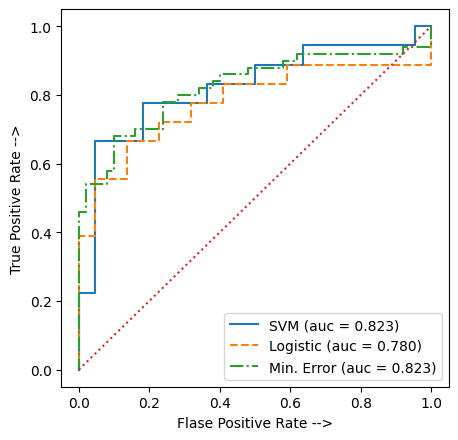

In [43]:
# Ahora a la clase A la voy a identificar con un 0 y a la clase B con un 1.
# Entonces genero otro dataset que me junte los valores de A y B en un solo atributo.

dfA = pd.DataFrame({"value":df['A'], "class": np.zeros((50,), dtype=int)})
dfB = pd.DataFrame({"value":df['B'], "class": np.ones((50,), dtype=int)})

data = pd.concat([dfA,dfB], ignore_index=True)

# Ahora necesito generar arrays separando los valores en "X" y las clases en "y" para luego entrenar el clasificador
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values

# Mínimo Error
data_ascending = data.sort_values(['value'], ignore_index=True)
paso = 1./50.

minerror_fpr = np.zeros([101], dtype=np.float64)
minerror_tpr = np.zeros([101], dtype=np.float64)

i = 0
minerror_fpr[i] = 1.
minerror_tpr[i] = 1.
for valor in data_ascending['class']:
  i += 1
  if valor == 0:  #False
    minerror_tpr[i] = minerror_tpr[i-1] 
    minerror_fpr[i] = minerror_fpr[i-1] - paso
  elif valor == 1:  #True
    minerror_tpr[i] = minerror_tpr[i-1] - paso
    minerror_fpr[i] = minerror_fpr[i-1]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

# SVM classifier
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)

# Logistic Classifier
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)

# Curva ROC
logistic_fpr, logistic_tpr, logistic_threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, svm_threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

auc_minerror = auc(minerror_fpr, minerror_tpr)

# Grafico las curvas y comparo los valores de AUC
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='solid', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, linestyle='dashed', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(minerror_fpr, minerror_tpr, linestyle='dashdot', label='Min. Error (auc = %0.3f)' % auc_minerror)
plt.plot([0, 1], linestyle='dotted')

plt.xlabel('Flase Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

Se observa que al acercar las medias de los conjuntos, las curvas ROC de los clasificadores cambian notablemente. Vemos que el SVM y el mínimo error presentan la misma área bajo la curva, pero mucho más baja que antes. Tenemos zonas donde el SVM anda mejor y zonas donde es mejor el de mínimo error. Esto depende de la distancia entre las curvas y la recta identidad. 

En este caso, existen muchísimos puntos de equilibrio para el clasificador de mínimo error. Cuál elegir como valor umbral dependerá de lo que querramos optimizar (tasa de verdaderos positivos, tasa de falsos positivos, exactitud, precisión, etc.). En mi caso, al ser un dataset generado aleatoriamente, decido maximizar la exactitud y precisión del clasificador.

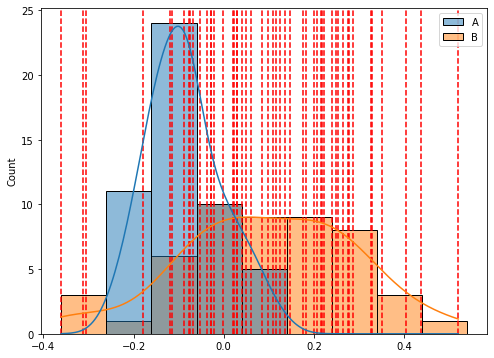

In [53]:
# Valor Umbral
TPR = np.zeros([101], dtype=np.float64)
FPR = np.zeros([101], dtype=np.float64)
x_umbral = np.zeros([101], dtype=np.float64)

j = 0
for i in range(1,101):
  if (minerror_tpr[i] - minerror_tpr[i-1] != 0):
    TPR[j] = minerror_tpr[i-1]
    FPR[j] = minerror_fpr[i-1]
    x_umbral[j] = data_ascending['value'][i-1]
    j += 1

for i in range(100,j-1,-1):
  TPR = np.delete(TPR,i)
  FPR = np.delete(FPR,i)
  x_umbral = np.delete(x_umbral,i)    

plt.figure(figsize=(8,6))
for i in range(0,j):
  plt.axvline(x=x_umbral[i], color='r', linestyle = 'dashed')
sns.histplot(df, binwidth=0.1, kde=True)

Vemos la cantidad de posibles valores umbral en el histograma. Evaluemos los parámetros de calidad para decidir con cuál quedarnos.

In [54]:
condition_positive = 50
condition_negative = 50

TP = np.zeros([j], dtype=np.float64)
FP = np.zeros([j], dtype=np.float64)
TN = np.zeros([j], dtype=np.float64)
FN = np.zeros([j], dtype=np.float64)
prediction_positive = np.zeros([j], dtype=np.float64)
prediction_negative = np.zeros([j], dtype=np.float64)
accuracy = np.zeros([j], dtype=np.float64)
precision = np.zeros([j], dtype=np.float64)

# Valores umbral 

for i in range(0,j):
  TP[i] = TPR[i] * condition_positive   # True Positive
  FP[i] = FPR[i] * condition_negative   # False Positive
  TN[i] = condition_negative - FP[i]    # True Negative
  FN[i] = condition_positive - TP[i]    # False Negative

  prediction_positive[i] = TP[i] + FP[i]
  prediction_negative[i] = TN[i] + FN[i]

  accuracy[i] = (TP[i] + TN[i]) / (condition_negative + condition_positive)
  precision[i] = TP[i] / prediction_positive[i]

In [60]:
l1 = ['']
l2 = ['Exactitud']
l3 = ['Precision']
for i in range(0,j):
  l1.append('Valor Umbral {}'.format(i+1))
  l2.append(round(accuracy[i],2))
  l3.append(round(precision[i],2))

tabla = [l1,
         l2,
         l3]

#print(tabulate(tabla,
#               tablefmt='fancy_grid',
#               stralign='center'))  

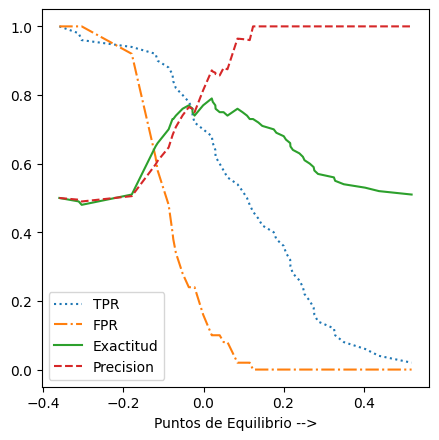

In [61]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(x_umbral, TPR, linestyle='dotted', label='TPR')
plt.plot(x_umbral, FPR, linestyle='dashdot', label='FPR')
plt.plot(x_umbral, accuracy, linestyle='solid', label='Exactitud')
plt.plot(x_umbral, precision, linestyle='dashed', label='Precision')

plt.xlabel('Puntos de Equilibrio -->')

plt.legend()

plt.show()

Vemos que la exactitud alcanza un valor máximo de aproximadamente 0.8. Elegiremos este punto como valor umbral

In [62]:
max = 0.
for i in range(0,j):
  if accuracy[i] > max:
    max = accuracy[i]
    k = i

print('Valor umbral elegido :', x_umbral[k])
print('Exactitud :', round(accuracy[k],2))
print('Precision :', round(precision[k],2))

Valor umbral elegido : 0.02064929462880452
Exactitud : 0.79
Precision : 0.87


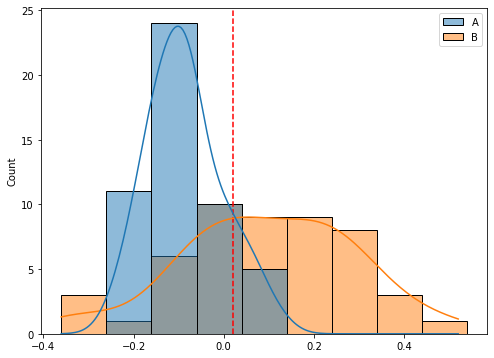

In [63]:
plt.figure(figsize=(8,6))
plt.axvline(x=x_umbral[k], color='r', linestyle = 'dashed')
sns.histplot(df, binwidth=0.1, kde=True)

## **Automatización del proceso**

Para que este proceso sea no supervisado o automático se puede definir una función que siga los pasos que fuimos haciendo, principalmente para el segundo dataset, cuyo valor de entrada sea el dataset y arroje a la salida un histograma indicando el valor umbral, como el anterior. Además que arroje la precisión y exactitud del método, así como la tasa de verdaderos positivos y falsos positivos. 

También habría que pasarle a la función qué medida de evaluación queremos optimizar, si la exactitud, precisión, TPR, FPR, etc., definiendo una por defecto si ésta no es pasada explícitamente como argumento.